In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from patsy import dmatrices

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn import tree

import graphviz
from graphviz import Source

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading in the csv file
df = pd.read_csv('19210540_05052021.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)
# Show data frame first few rows
df.head()

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",No,No,No,Unknown
1,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,No,No,Yes
2,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,No,No,Unknown
3,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",No,No,No,Unknown
4,Laboratory-confirmed case,Female,70 - 79 Years,Unknown,Yes,Yes,No,Unknown


# 1.1 Randomly shuffle and split data for training and testing

<li>Below I am setting the target feature death_yn to the y variable.</li>
<li>the X variable is being set to every other column.</li>

In [3]:
y = pd.DataFrame(df["death_yn"])
X = df.drop(["death_yn"],1)

This code is splitting the data into a 70% training dataset and a 30% test set. The random_state parameter is set to one so that the datasets are randomly shuffled.<br>
This shows the number of data rows in each of the data frames we are using.
<li>The original data frame</li>
<li>The new training data frame</li>
<li>The new test data frame</li>


In [4]:
#Split the data into trainig data and test data 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle=True)
print("original range is: ",df.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  9907
training range (70%):	 rows 0 to 6934
test range (30%): 	 rows 6934 to 9907


# 1.2  Plot categorical pairwise interaction with target feature

Next, I will plot each of the independent variables against the target feature. Each plot will be based on the training data set.

In [5]:
test_df=pd.concat([X_test, y_test],axis=1)
test_df.head()

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,medcond_yn,death_yn
5444,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",No,No,Unknown,No
6202,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",No,No,Yes,No
3261,Laboratory-confirmed case,Female,60 - 69 Years,Unknown,Unknown,Unknown,Unknown,No
8605,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Unknown,Unknown,Unknown,No
8720,Probable Case,Female,20 - 29 Years,Unknown,Unknown,Unknown,Unknown,No


In [6]:
train_df=pd.concat([X_train,y_train],axis=1)
train_df.head()

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,medcond_yn,death_yn
8952,Laboratory-confirmed case,Male,70 - 79 Years,Unknown,Unknown,Unknown,No,No
5483,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Unknown,Unknown,Unknown,No
2408,Laboratory-confirmed case,Male,40 - 49 Years,"Multiple/Other, Non-Hispanic",Unknown,Unknown,Unknown,No
5704,Laboratory-confirmed case,Female,50 - 59 Years,Unknown,Unknown,Unknown,Unknown,No
9011,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,No,Yes,No


## Current status vs death_yn

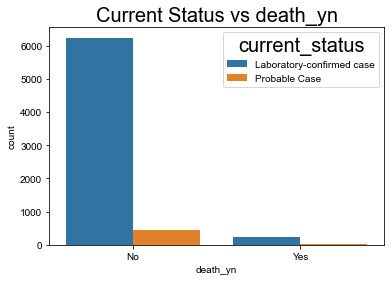

In [7]:
#bar chart to see correlation between death and age group
current_status_vs_death_yn=sns.countplot(x='death_yn',hue="current_status",data=train_df)
sns.set(rc={'figure.figsize':(15,8.27)})
  
# for legend text 
plt.setp(current_status_vs_death_yn.get_legend().get_texts(), fontsize='10')   
  
# for legend title 
plt.setp(current_status_vs_death_yn.get_legend().get_title(), fontsize='20')
current_status_vs_death_yn.set_title("Current Status vs death_yn", fontsize=20)
plt.show() 

This graph compares the number of deaths in this dataset that had confirmed cases of covid-19 and it shows that all deaths had a laboratory confirmed diagnosis. 

## Age_group vs  death_yn

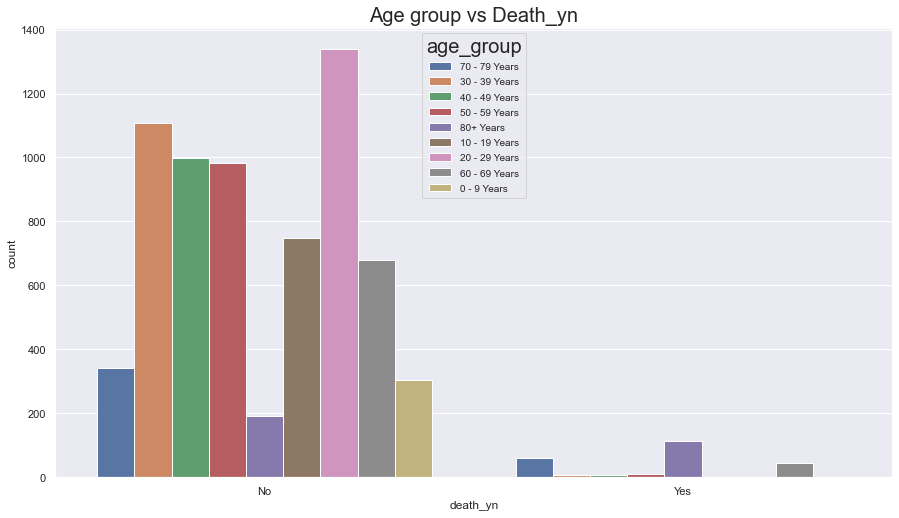

In [8]:
#bar chart to see correlation between death and age group
age_group_vs_death_yn=sns.countplot(x='death_yn',hue="age_group",data=train_df)
sns.set(rc={'figure.figsize':(15,8.27)})
  
# for legend text 
plt.setp(age_group_vs_death_yn.get_legend().get_texts(), fontsize='10')   
  
# for legend title 
plt.setp((age_group_vs_death_yn).get_legend().get_title(), fontsize='20')
age_group_vs_death_yn.set_title("Age group vs Death_yn", fontsize=20)
plt.show() 

     

This graph compares the death rate with age group. The highest mortality rate is in those patients age 80+. If we look at the trend in age in the yes column we can see an upward trend of death as age increases. 

## sex vs death_yn

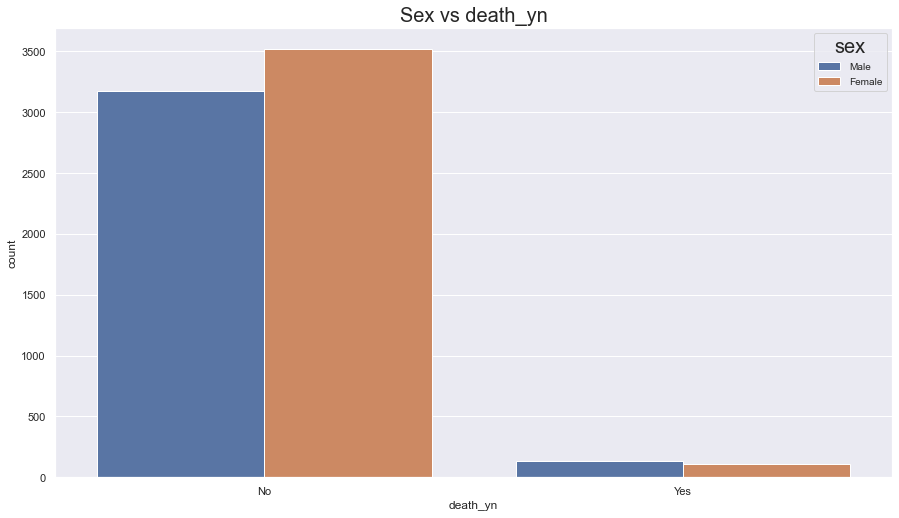

In [9]:
#bar chart to see correlation between death and age group
sex_vs_death_yn=sns.countplot(x='death_yn',hue="sex",data=train_df)
  
# for legend text 
plt.setp(sex_vs_death_yn.get_legend().get_texts(), fontsize='10')   
  
# for legend title 
plt.setp(sex_vs_death_yn.get_legend().get_title(), fontsize='20')
sex_vs_death_yn.set_title("Sex vs death_yn", fontsize=20)
plt.show() 

In [10]:
#Displays the individual count for each unique value for sex
sex_counts = train_df["sex"].value_counts()
print(sex_counts)

Female    3630
Male      3304
Name: sex, dtype: int64


In [11]:
death_count = train_df.groupby(['sex', 'death_yn']).size()
death_count

sex     death_yn
Female  No          3519
        Yes          111
Male    No          3174
        Yes          130
dtype: int64

## Race/ethnicity vs death_yn

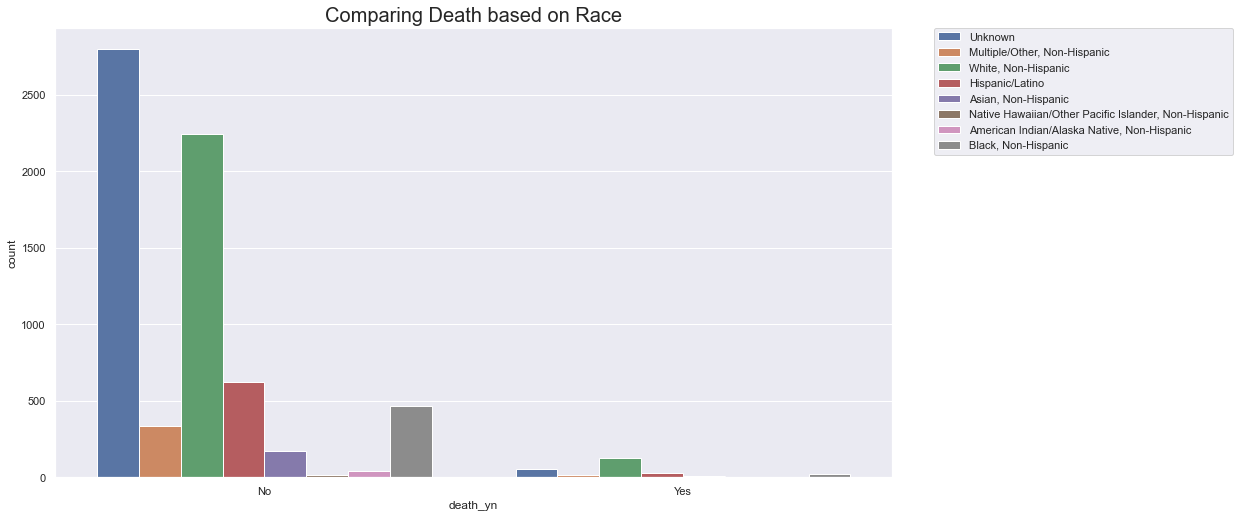

In [12]:
#bar chart to see correlation between death and age group
race_ethnicity_vs_death_yn=sns.countplot(x='death_yn',hue="race_ethnicity_combined",data=train_df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
  
# for legend text 
plt.setp(race_ethnicity_vs_death_yn.get_legend().get_texts(), fontsize='10')   
  
# for legend title 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(race_ethnicity_vs_death_yn.get_legend().get_title(), fontsize='20')
race_ethnicity_vs_death_yn.set_title("Comparing Death based on Race", fontsize=20)
plt.show() 

This graph compares the death rate with the race of the patient. It shows that there is a large portion of data where the race is unknown. White non-Hispanic patients have the highest death rate but also have the highest representation in the dataset of known race.<br>

In [13]:
#Displays the individual count for each unique value for race
race_counts = train_df["race_ethnicity_combined"].value_counts()
print(race_counts)

Unknown                                                 2850
White, Non-Hispanic                                     2367
Hispanic/Latino                                          650
Black, Non-Hispanic                                      484
Multiple/Other, Non-Hispanic                             346
Asian, Non-Hispanic                                      178
American Indian/Alaska Native, Non-Hispanic               41
Native Hawaiian/Other Pacific Islander, Non-Hispanic      18
Name: race_ethnicity_combined, dtype: int64


In [14]:
race_count = train_df.groupby(['race_ethnicity_combined', 'death_yn']).size()
race_count

race_ethnicity_combined                               death_yn
American Indian/Alaska Native, Non-Hispanic           No            41
Asian, Non-Hispanic                                   No           172
                                                      Yes            6
Black, Non-Hispanic                                   No           464
                                                      Yes           20
Hispanic/Latino                                       No           624
                                                      Yes           26
Multiple/Other, Non-Hispanic                          No           333
                                                      Yes           13
Native Hawaiian/Other Pacific Islander, Non-Hispanic  No            17
                                                      Yes            1
Unknown                                               No          2799
                                                      Yes           51
White, Non-His

## Hospital admissions vs death_yn

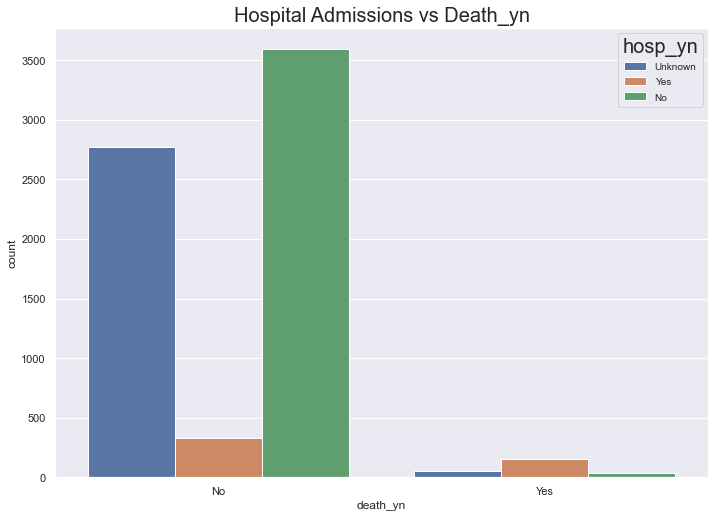

In [15]:
#bar chart to see correlation between death and age group
hospital_yn_vs_death_yn=sns.countplot(x='death_yn',hue="hosp_yn",data=train_df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
  
# for legend text 
plt.setp(hospital_yn_vs_death_yn.get_legend().get_texts(), fontsize='10')   
  
# for legend title 
plt.setp(hospital_yn_vs_death_yn.get_legend().get_title(), fontsize='20')
hospital_yn_vs_death_yn.set_title("Hospital Admissions vs Death_yn", fontsize=20)
plt.show() 

In [16]:
df['hosp_yn'].value_counts()

No         5143
Unknown    4089
Yes         675
Name: hosp_yn, dtype: int64

This graph compares the death rate between people who were in hospital and those who were not admitted. It shows that a large portion of the dataset were not admitted into hospital.<br>
Less people that were admitted to hospital died than were admitted and survived.

## ICU admissions vs death_yn

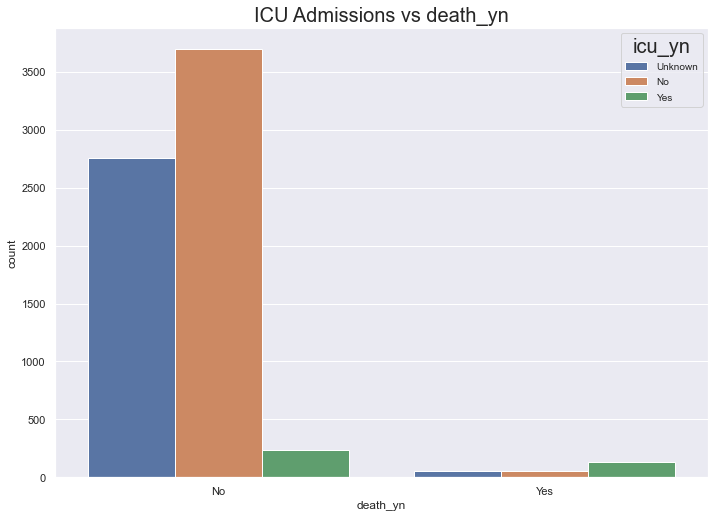

In [17]:
#bar chart to see correlation between death and age group
icu_yn_vs_death_yn=sns.countplot(x='death_yn',hue="icu_yn",data=train_df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
  
# for legend text 
plt.setp(icu_yn_vs_death_yn.get_legend().get_texts(), fontsize='10')   
  
# for legend title 
plt.setp(icu_yn_vs_death_yn.get_legend().get_title(), fontsize='20')
icu_yn_vs_death_yn.set_title("ICU Admissions vs death_yn", fontsize=20)
plt.show() 

In [18]:
df['icu_yn'].value_counts()

No         5315
Unknown    4070
Yes         522
Name: icu_yn, dtype: int64

This is very similar to the hospital admissions as the data has been mapped from Hosp_yn to ICU_yn I will only examine one should I choose to add to my modelling dataset.

## Medical condition vs death_yn 

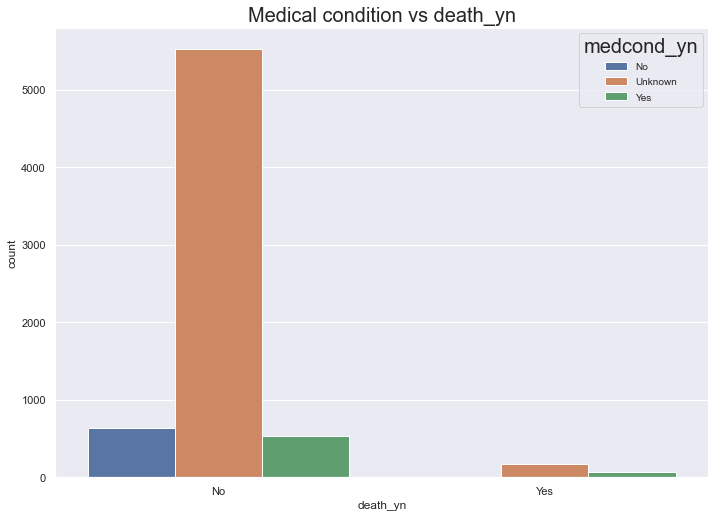

In [19]:
#bar chart to see correlation between death and age group
med_cond_vs_death_yn=sns.countplot(x='death_yn',hue="medcond_yn",data=train_df)
  
# for legend text 
plt.setp(med_cond_vs_death_yn.get_legend().get_texts(), fontsize='10')   
  
# for legend title 
plt.setp(med_cond_vs_death_yn.get_legend().get_title(), fontsize='20')
med_cond_vs_death_yn.set_title("Medical condition vs death_yn", fontsize=20)
plt.show() 

This graph is to visualise any relationship between existing medical conditions and the outcome of death. Less people died that had a medical condition than those that died of covid and had a medical condition. Medical conditions do not seem to help predict the outcome of death. We would need to see what is constituted as a medical condition and maybe only use those medical conditions that seem to strongly relate to the patient’s ability to recover from Covid-19. A patient with mental illness may not be as susceptible as a patient with a physical medical condition such as heart disease or diabetes or lung problems. Further medical advice should be sought for clarification on this. 

## 1.2.1 Promising features to train the models on.

1. age_group
2. race/ethnicity_combined
3. hosp_yn

## 1.2.2 Justify choices

- The age group data displays a strong correlation between age and death in the over 80's more so than other age groups.<br>
- The race data shows that more white, non-Hispanic people died than other races but needs further investigation are other groups just underrepresented perhaps showing percentage of death vs race would give a clearer indication and balance the data more.<br>
- Hospital admissions will also help to train the model I believe as it has one of the largest counts of deaths 675 deaths to the icu's 522 and as the hospital data is mapped to fill in missing data in the icu_yn column I do not think I need to use both. 


# 2. Linear Regression

Linear regression is a supervised learning algorithm that assumes a linear relationship between the features or X and the target y. (X and y defined just above).<br>
To use the linear regression model all features must be numeric and I have transformed the features above, converting categorical data into numeric representations for both test and train data frames.<br>
We will review the three stages of this algorithm.
<li>The Training stage</li>
This is the stage where the algorithm earns the parameters.
<li>The prediction stage</li>
The algorithm applies the learned weights to the descriptive features or (X) for each example in the dataset to predict the target(y)
<li>Evaluation</li>
This measures how well the model works for this dataset. It measures the error between the actual target outcome vs the predicted target outcome. In other words, how well can the model predict the target outcome based on what it has learned from the dataset. 


### Preparing the data for modelling

In [20]:
train_df.head()

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,medcond_yn,death_yn
8952,Laboratory-confirmed case,Male,70 - 79 Years,Unknown,Unknown,Unknown,No,No
5483,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Unknown,Unknown,Unknown,No
2408,Laboratory-confirmed case,Male,40 - 49 Years,"Multiple/Other, Non-Hispanic",Unknown,Unknown,Unknown,No
5704,Laboratory-confirmed case,Female,50 - 59 Years,Unknown,Unknown,Unknown,Unknown,No
9011,Laboratory-confirmed case,Male,80+ Years,"White, Non-Hispanic",Yes,No,Yes,No


In [21]:
#dropping columns I don't find informative for the predictive modelling.
df=df.drop(['current_status','sex','icu_yn','medcond_yn'],1)

The next 5 cells are to make the categorical data numerical so we can use it in the predictive models. 
<li>death_yn I will code yes as 1 and 0 as no</li>
<li>current_status Laboratory confirmed case=1 probable case 0</li>
<li>sex male =1 female=0</li>
<br>
<li>age group</li>
50 - 59 Years=50<br>
20 - 29 Years=20<br>
40 - 49 Years=40<br>
Missing=0<br>
60 - 69 Years=60<br>
0 - 9 Years=10<br>
70 - 79 Years=70<br>
10 - 19 Years=11<br>
80+ Years=80<br>
30 - 39 Years=30<br>
<br>
<li>race_ethnicity_combined</li>
Unknown=0<br>
White, Non-Hispanic=1<br>
Hispanic/Latino=2<br>
Black, Non-Hispanic=3<br>
Multiple/Other Non-Hispanic=4<br>
Asian, Non-Hispanic=5<br>
American Indian/Alaska Native, Non-Hispanic=6<br>
Native Hawaiian/Other Pacific Islander, Non-Hispanic=7<br>


In [22]:
df['death_yn'] = df['death_yn'].replace(['Yes','No'],[1,0])

In [23]:
df['age_group'] = df['age_group'].replace(['50 - 59 Years', '20 - 29 Years', '40 - 49 Years', 'Missing',
       '60 - 69 Years', '0 - 9 Years', '70 - 79 Years', '10 - 19 Years',
       '80+ Years', '30 - 39 Years'],[50,20,40,0,60,10,70,11,80,30])

In [24]:
df["race_ethnicity_combined"]= df['race_ethnicity_combined'].replace(['Unknown','White, Non-Hispanic','Hispanic/Latino','Black, Non-Hispanic','Multiple/Other, Non-Hispanic','Asian, Non-Hispanic','American Indian/Alaska Native, Non-Hispanic','Native Hawaiian/Other Pacific Islander, Non-Hispanic'],[0,1,2,3,4,5,6,7])

In [25]:
df['hosp_yn']=df['hosp_yn'].replace(['Yes','No','Unknown'],[1,0,2])

In [26]:
#the training data I will be using to train the various predictive models. 
df.head(10)

,age_group,race_ethnicity_combined,hosp_yn,death_yn
0,60,1,0,0
1,10,2,0,0
2,20,0,0,0
3,20,1,0,0
4,70,0,1,0
5,80,1,1,1
6,50,1,0,0
7,50,2,0,0
8,50,0,0,0
9,11,4,0,0


In [27]:
X = df.drop(["death_yn"],1)
y = df["death_yn"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle=True)

In [29]:
print("original range is: ",df.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  9907
training range (70%):	 rows 0 to 6934
test range (30%): 	 rows 6934 to 9907


### 2.1 Training the Linear regression model

In [30]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.10197179649803245

### 2.2 Coefficients

In [31]:
# Print the weights learned for each feature.
print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", reg.coef_)
print("\nIntercept is: \n", reg.intercept_)
print("\nFeatures and coeficients: \n", list(zip(X_train.columns, reg.coef_)))


Features are: 
 Index(['age_group', 'race_ethnicity_combined', 'hosp_yn'], dtype='object')

Coeficients are: 
 [0.00290369 0.00568828 0.00755095]

Intercept is: 
 -0.0860117927396804

Features and coeficients: 
 [('age_group', 0.002903686286456338), ('race_ethnicity_combined', 0.005688283998740665), ('hosp_yn', 0.007550952367473612)]


Hosp_yn, age group and race have positive coefficients which suggests a positive correlation with death_yn.<br>
This seems to be in line with what we saw in the graphs in part one with age and race being two of the most important factors in determining if a person was more likely to die because of covid-19.<br>
But we need to be mindful that this data set is heavily biased towards the white non-Hispanic race/ethnicity. More data would be beneficial from other races to ensure its applicable across all races, as this is based on American data may imply a social imbalance as opposed to a medical imbalance with white non-Hispanic ethnicities having greater access to medical care and thus it being more widely recorded as being more predominant in that race.<br>
The intercept is calculated at -0.086 which is the starting point if all the other coefficients were 0. 


In [32]:
# need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.head(5)

,age_group,race_ethnicity_combined,hosp_yn
0,70,0,2
1,30,0,2
2,40,4,2
3,50,0,2
4,80,1,1


### 2.3 The predicted target feature value for the first 10 training examples

In [33]:
#Print the predicted target feature value for the first 10 training examples.
reg_predictions_train = reg.predict(X_train) 
print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_linreg = pd.concat([y_train, pd.DataFrame(reg_predictions_train, columns=['Predictions'])], axis=1)
print(actual_vs_predicted_linreg.head(10))


Predictions with multiple linear regression: 

   death_yn  Predictions
0         0     0.132348
1         0     0.016201
2         0     0.067991
3         0     0.074274
4         0     0.159522
5         0     0.045238
6         0    -0.048383
7         0    -0.027938
8         0     0.103311
9         0     0.110963


### 2.3.1 Threshold the predicted target feature @0.5 for each example

In [34]:
# calculate the prediction and threshold the value. If >= 0.5 its true
threshold_reg_predictions_train = (reg.predict(X_train) >= 0.5) * 1.0

### 2.3.2 Print the predicted class for the first 10 examples. 

In [35]:
print("\nPredictions with linear regression: \n")
threshold_actual_vs_predicted_linreg = pd.concat([y_train, pd.DataFrame(threshold_reg_predictions_train, columns=['Prediction'])], axis=1)
print(threshold_actual_vs_predicted_linreg.head(10))


Predictions with linear regression: 

   death_yn  Prediction
0         0         0.0
1         0         0.0
2         0         0.0
3         0         0.0
4         0         0.0
5         0         0.0
6         0         0.0
7         0         0.0
8         0         0.0
9         0         0.0


In [36]:
threshold_actual_vs_predicted_linreg['Prediction'].unique()

array([0.])

Already we can see that Linear regression is possible not a good fit for this data set as the prediction set doesn't contain any predictions of death which is the positive class it only contains 0 which is the negative class.

### 2.3.3 Print a few classifications evaluation mesures and discuss findings.

In [37]:
# Some more evaluation metrics.
print("==================== Train Data =======================")
print("Accuracy : ", metrics.accuracy_score(y_train, threshold_reg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, threshold_reg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, threshold_reg_predictions_train))
print("======================================================")

==================== Train Data =======================
Accuracy :  0.9652437265647534
Confusion matrix: 
 [[6693    0]
 [ 241    0]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      1.00      0.98      6693
           1       0.00      0.00      0.00       241

    accuracy                           0.97      6934
   macro avg       0.48      0.50      0.49      6934
weighted avg       0.93      0.97      0.95      6934



-<b>Accuracy</b><br>
Provides information on how often the model is correct.<br>
Accuracy is 97%. 
<br>
-<b>Confusion Matrix</b>
- [0][0] TRUE NEGATIVE - The number that is predicted 0 that was 0=6693
- [0][1] FALSE POSITIVE - The number that is predicted 1 that is 0=0
- [1][0] FALSE NEGATIVE - The number that is predicted 0 that is 1=241
- [1][1] TRUE POSITIVE - The number that is predicted 1 that is 1=0
This model did not correctly predict any of the positive class.
    <br>
-<b>Precision</b>
Precision positive is 0.
precision negative is 0.97.
<br>
-<b>Recall</b>
Recall positive is 0.
Recall Negative is 1
<br>
-<b>F1 Score</b>
F1 positive is 0.
F1 negative is 0.98.
<br>
<b>Summary</b>
- The model is unable to predict where death is likely due to the small data size. The negative class is the dominant class.
- I believe the accuracy is so high for the negative class because the data for death=yes is much less than death=no.   
- The model is good at predicting the negative class. It can predict where death is unlikely with great accuracy, but this is due to the data being heavily weighted with death_yn = No.
- The positive class has failed to predict.


# 2.4 Evaluating the test data

This is where we can test to see how well the model can predict the target outcome based on its learning. Here we will present data that the algorithm has not seen before the test_df data frame, to see if it can accurately predict whether a person is more likely to die or not.

In [38]:
# calculate the prediction and threshold the value. If >= 0.5 its true
reg_predictions_test = (reg.predict(X_test) >= 0.5) * 1.0

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_test, pd.DataFrame(reg_predictions_test, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(10))


Predictions with multiple linear regression: 

   death_yn  Predicted
0         0        0.0
1         0        0.0
2         0        0.0
3         0        0.0
4         0        0.0
5         0        0.0
6         0        0.0
7         1        0.0
8         0        0.0
9         0        0.0


In [39]:
# Some more evaluation metrics.
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, reg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, reg_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, reg_predictions_test))
print("======================================================")

==================== Test Data =======================
Accuracy:  0.9667003027245207
Confusion matrix: 
 [[2874    0]
 [  99    0]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      1.00      0.98      2874
           1       0.00      0.00      0.00        99

    accuracy                           0.97      2973
   macro avg       0.48      0.50      0.49      2973
weighted avg       0.93      0.97      0.95      2973



The data is very much the same when used with the test data frame as with the train data frame. It continues to favour the negative class over the positive class as there is just not enough data to train the model with regarding the positive class.<br>
The positive class has completely failed and is not able to predict anything.<br>

    Training data
    Confusion matrix: 
     [[6693    0]
     [ 241    0]]
     
     Test data
     Confusion Matrix
     [[2874    0]
     [  99    0]]

Both have 0 False positives.
traing data has 241 false negative.
test data has 99 false negatives.


### 2.4.1 Cross validation

In [40]:
def cross_val_LinReg(X, y, cv=3, scoring='accuracy'):
    """Functions to carry out cross validation on the linear regression model
    Default number of validations is 3. The random state will be updated 
    at each iteration to allow our results to be repeated"""
    
    # store results
    results = []
    # evaluate cv times and append to results
    for i in range(cv):
        # set up train test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i , test_size=0.3)
        # generate model
        multiple_linreg = LinearRegression().fit(X_train, y_train)
        # threshold
        multiple_linreg_predictions = (multiple_linreg.predict(X_test) >= 0.5) * 1.0
        # calc score
        if scoring=='accuracy':
            score = metrics.accuracy_score(y_test, multiple_linreg_predictions)
        elif scoring=='precision':
            score = metrics.precision_score(y_test, multiple_linreg_predictions)
        elif scoring=='f1':
            score = metrics.f1_score(y_test, multiple_linreg_predictions)
        elif scoring=='recall':
            score = metrics.recall_score(y_test, multiple_linreg_predictions)
        # append to results
        results.append(score)
    return results

In [41]:
def cross_val_LinReg_DF(X,y):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    linRegResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']
    
    for metric in test_metrics:
        # generate test results
        result = cross_val_LinReg(X, y, cv=10, scoring=metric)
        length = len(result)
        # store result in dict
        linRegResults[metric] = sum(result)/length

    # create dataframe with results
    LinRegDF = pd.DataFrame.from_dict(linRegResults, orient='index', columns=['Linear_Regression'])
    
    return LinRegDF

In [42]:
linRegDF = cross_val_LinReg_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
linRegDF

Mean results from 10 fold cross validation are:


,Linear_Regression
accuracy,0.964649
precision,0.000000
recall,0.000000
f1,0.000000


The cross validation shows a similar picture to the other two dataframes. It has an accuracy of 96.46% but the precision recall and f1 are all 0. This is due to the poor performace of the model on the positive class and really the only way to train a better model would be to provide more data.  

### 2.4.2 Compare cross validation with single training.

Single training Accuracy = 97%

                    Classification report:
                precision    recall  f1-score   

           0       0.97      1.00      0.98     
           1       0.00      0.00      0.00   
           
Even though we have a good recall, precision and f1-score for the negative class in the single training model. When they are returned from the  cross validation function they are all 0. This is due to the fact that they are all zero in the positive class and when combined for both classes it returns a zero result. The linear model had failed with its predictions.

# 3. Logistic Regression

Logistical Regression is an algorithm to train a model for predicting categorical features. A linear relationship is assumed between the Target feature and the descriptive feature. It is used for classification task even though it has regression in the name.<br>
We assume only 2 classes binary classification could be (1, 0) or (1,-1)

## 3.1 Train the Logistic model

In [43]:
# Train or fit, a model using all categorical features.
logisticreg = LogisticRegression().fit(X_train, y_train)

## 3.2 Print Coefficients

In [44]:
# Print the weights learned for each feature.
print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", logisticreg.coef_)
print("\nIntercept is: \n", logisticreg.intercept_)
print("\nFeatures and coeficients: \n", list(zip(X_train.columns, logisticreg.coef_)))


Features are: 
 Index(['age_group', 'race_ethnicity_combined', 'hosp_yn'], dtype='object')

Coeficients are: 
 [[0.11342629 0.17925648 0.25993607]]

Intercept is: 
 [-10.1095262]

Features and coeficients: 
 [('age_group', array([0.11342629, 0.17925648, 0.25993607]))]


### 3.2.1 Discuss Coefficient results
The three descriptive features age race and hospital admission have positive coefficients which, likely means a positive relationship between these descriptive features and the target feature.<br>
The intercept is calculated at -10.188 which is the starting point if all the other coeffiecents were 0.


## 3.3 Print 10 predicted target features and evaluate prediction

In [45]:
#Print the predicted target feature value for the first 10 training examples
y_train.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: death_yn, dtype: int64

### 3.3.1 Print the first 10 examples of the predicted class

In [46]:
# calculate the prediction
logisticreg_predictions_train = logisticreg.predict(X_train)

print("\nPredictions with logistic regression: \n")
actual_vs_predicted_logisticreg = pd.concat([y_train, pd.DataFrame(logisticreg_predictions_train, columns=['Predictions'])], axis=1)
print(actual_vs_predicted_logisticreg.head(10))


Predictions with logistic regression: 

   death_yn  Predictions
0         0            0
1         0            0
2         0            0
3         0            0
4         0            0
5         0            0
6         0            0
7         0            0
8         0            0
9         0            0


In [47]:
actual_vs_predicted_logisticreg['Predictions'].unique()

array([0, 1], dtype=int64)

In [48]:
actual_vs_predicted_logisticreg['death_yn'].unique()

array([0, 1], dtype=int64)

It seems that the logistic regression is fairing better than linear regression as it has managed to predict some of the positive class. We will know look at more evaluation measures to see how much better it has performed.

### 3.3.2 Classification evaluation measures

In [49]:
# Some more evaluation metrics.
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, logisticreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, logisticreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, logisticreg_predictions_train))
print("======================================================")

==================== Train Data =======================
Accuracy:  0.9652437265647534
Confusion matrix: 
 [[6686    7]
 [ 234    7]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      1.00      0.98      6693
           1       0.50      0.03      0.05       241

    accuracy                           0.97      6934
   macro avg       0.73      0.51      0.52      6934
weighted avg       0.95      0.97      0.95      6934



### 3.3.3 Interpretation of results

-<b>Accuracy</b>
We have an accuracy of 97%
<br>
-<b>Precision</b> 
Precision Positive is 0.50
Precision Negative is 0.97
<br>
<b>-Recall</b> - What % of the positive values did we predict.
Recall Positive is 0.03
Recall Negative is 1.00
<br>
<b>-F1 Score</b> - Is a weighted average of Precision and recall.
F1 Score Positive is 0.05
F1 Score Negative is 0.98
<br>
<b>-Summary</b>

Accuracy is in line with the linear regression model.
The logistic model is also a little better at predicting the positive class but, it could only predict the positive class 50% of the time.<br>
For the negative class precision is 97%. It could predict the negative class 97% of the time.<br>
Recall is 100% as all 0 values were predicted 100% of the time. 
F1 is the weighted average of precision and recall.


## 3.4 Evaluate model on test set

In [50]:
# calculate the prediction and threshold the value. If >= 0.5 its true
logisticreg_predictions_test = logisticreg.predict(X_test)

print("\nPredictions with linear regression: \n")
actual_vs_predicted_logisticreg = pd.concat([y_test, pd.DataFrame(logisticreg_predictions_test, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_logisticreg.head(10))


Predictions with linear regression: 

   death_yn  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
5         0          0
6         0          0
7         1          0
8         0          0
9         0          0


In [51]:
# Some more evaluation metrics.
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, logisticreg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, logisticreg_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, logisticreg_predictions_test))

==================== Test Data =======================
Accuracy:  0.9660275815674403
Confusion matrix: 
 [[2870    4]
 [  97    2]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      1.00      0.98      2874
           1       0.33      0.02      0.04        99

    accuracy                           0.97      2973
   macro avg       0.65      0.51      0.51      2973
weighted avg       0.95      0.97      0.95      2973



### 3.4.1 Compare results of the test dataframe with the train dataframe.
The data has remained unchanged for the negative class.
-<b>Accuracy</b>
Accuracy remains unchanged at 97%
<br>
-<b>Precision</b> 
Precision Positive has fallen from 0.33 to 0.50.
<br>
<b>-Recall</b> - What % of the positive values did we predict
Recall Positive is 0.02 fallen from 0.03
<br>
<b>-F1 Score</b> - Is an a weighted average of Precision and recall
F1 Score Positive is 0.04 fallen from 0.05
<br>
<b>-Summary</b>

Logistic regression is able to preditc the negative class very well on new data. It has fallen slighlty on predicting the positive class but that is to be expected on a new dataset.

    Test data
    Confusion Matrix
     [[2870    4]
     [  97    2]]
     
The test data has:
4 False positives
2 True positives
97 False Negatives
2870 True Negatives

     
     Training data
     Confusion matrix: 
     [[6686    7]
     [ 234    7]]
     
The training data has:
7 False positives
7 True positives
234 False Negatives
6686 True Negatives   

So even though each of the models are telling us that it has a good accuracy the are still making mistakes on the predictions.
     

### 3.4.2 Cross validation

In [52]:
def cross_val_LogReg_DF(X,y):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    logRegResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        # generate test results
        result = cross_val_score(LogisticRegression(), X, y, scoring=metric, cv=10)
        # store result in dict
        logRegResults[metric] = result.mean()
        
    # create dataframe with results
    LogRegDF = pd.DataFrame.from_dict(logRegResults, orient='index', columns=['Logistic_Regression'])
    
    return LogRegDF

In [53]:
logRegDF = cross_val_LogReg_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
logRegDF

Mean results from 10 fold cross validation are:


,Logistic_Regression
accuracy,0.965277
precision,0.221429
recall,0.029412
f1,0.050998


### 3.4.3 Compare cross validation metrics to the single training
The mean result of 10 sets of results.<br>
Accuracy has fallen by 1% in comparison to the train and test data<br>
Precision has fallen in comparison to the train and test data. I imagine it’s the mean results of the positive class that is causing this to be low. 
Recall and f1 are within 1% of the other results from the train and test datasets.


# 4. Random Forest Model

## 4.1 Train a random forest model

In [54]:
# Train RF with 100 trees
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=1)

## 4.2 Interpret the Random Forest Model

A random forest tree model builds a committee of decision tree models and returns a final prediction calculated by aggregating the predictions of all the decision trees.<br>
<b>Decision tree</b><br>
A decision tree model is a set of if-then-else rules that we train using our training data.
A decision tree is made up of a subset of the original data.<br>
The max depth of a decision tree is the maximum number of times the data can be split. Below are examples of a decision tree that is 4 level deep and one that is 10 levels deep.<br>
<b>Random Forest</b><br>
A random Forest model is made up of multiple Decision Tree models the one we will use has a default of 100.


In [55]:
#Train a decision tree
dtc4 = DecisionTreeClassifier(max_depth=4, random_state=1)
dtc10 = DecisionTreeClassifier(max_depth=10, random_state=1)
dtc4.fit(X_train, y_train)
dtc10.fit(X_train, y_train)
print("Max depth 4: \n",dtc4)
print("Max depth 10: \n",dtc10)

Max depth 4: 
 DecisionTreeClassifier(max_depth=4, random_state=1)
Max depth 10: 
 DecisionTreeClassifier(max_depth=10, random_state=1)


In [56]:
# create a Graphviz png
with open("DecisionTree4.dot", 'w') as f1:
    f1 = export_graphviz(dtc4, out_file=f1, feature_names=X_train.columns)
with open("DecisionTree10.dot", 'w') as f2:
    f2 = export_graphviz(dtc10, out_file=f2, feature_names=X_train.columns)
!dot -Tpng DecisionTree4.dot -o DecisionTree4.png
!dot -Tpng DecisionTree10.dot -o DecisionTree10.png

Below is a decision tree with max_depth=4<br>

The root is age_group at value 75.0 - This splits the data with the highest information gain.<br>
For each split the model selects the next best feature.
This continues until it reaches a leaf node where the data cannot be split anymore.<br>
The output of this is the prediction.<br>
We can see one path below is resolved in 3 branches<br>
age_group <= 75.0 -> age_group <= 55.0 -> age_group <= 25.0 -> Resolved to TRUE<br>
Note: only 1 entry meets this requirement. All other entries need additional branches to be resolved

<img src="DecisionTree4.png">

<img src="DecisionTree10.png">

Below we are evaluating our descriptive features and examining which features have the highest importance according to the Random Forest model. 
1. Age_group
2. Race_ethnicity_combined
3. Hosp_yn

This seems to agree with earlier interpretation that age is the largest factor in predicting the target outcome.  

In [57]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})
importance.sort_values('importance', ascending=False)

,feature,importance
0,age_group,0.540155
2,hosp_yn,0.334452
1,race_ethnicity_combined,0.125394


## 4.3 Print the first 10 example of the predicted class and the target feature.

In [58]:
#Print the predicted target feature value for the first 10 training examples
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_train = rfc.predict(X_train)
df_true_vs_rfc_predicted = pd.DataFrame({'Actual': y_train, 'Predictions': rfc_predictions_train})
df_true_vs_rfc_predicted.head(10)

,Actual,Predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [59]:
df_true_vs_rfc_predicted ['Predictions'].unique()

array([0, 1], dtype=int64)

In [60]:
df_true_vs_rfc_predicted ['Actual'].unique()

array([0, 1], dtype=int64)

This is a promising start as we have some predictions for both classes we will now look at further evaluation metrics and see how good this model is at predicting both the negative and positive classes.

### 4.3.1 Classification Evaluation Measures

In [61]:
#Print a few classification evaluation measures computed on the full training set
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, rfc_predictions_train))

==================== Train Data =======================
Accuracy:  0.9678396308047303
Confusion matrix: 
 [[6641   52]
 [ 171   70]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      0.99      0.98      6693
           1       0.57      0.29      0.39       241

    accuracy                           0.97      6934
   macro avg       0.77      0.64      0.68      6934
weighted avg       0.96      0.97      0.96      6934



### 4.3.2 Interpretation of results

-<b>Accuracy</b>
We have an accuracy of 97%
<br>
-<b>Precision</b> 
Precision Positive is 0.57
Precision Negative is 0.97
<br>
<b>-Recall</b> - What % of the positive values did we predict
Recall Positive is 0.29
Recall Negative is 0.99
<br>
<b>-F1 Score</b> - Is an a weighted average of Precision and recall
F1 Score Positive is 0.39
F1 Score Negative is 0.98
<br>
<b>-Summary</b>

Accuracy is in line with the linear regression model
The Random Forest model is better at predicting the positive class than both the linear regression model and the logistic regression model.


## 4.4 Evaluate model on test set

In [62]:
# Predicted class labels for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_test = rfc.predict(X_test)
df_true_vs_rfc_predicted_test = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': rfc_predictions_test})
df_true_vs_rfc_predicted_test.head(10)

,ActualClass,PredictedClass
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [63]:
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, rfc_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, rfc_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, rfc_predictions_test))


==================== Test Data =======================
Accuracy:  0.9653548604103599
Confusion matrix: 
 [[2845   29]
 [  74   25]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      0.99      0.98      2874
           1       0.46      0.25      0.33        99

    accuracy                           0.97      2973
   macro avg       0.72      0.62      0.65      2973
weighted avg       0.96      0.97      0.96      2973



### 4.4.1 Compare training and test data

 Interpretation of results
THe negative class remains unchanged.
-<b>Accuracy</b>
We have an accuracy of 97%
<br>
-<b>Precision</b> 
Precision Positive is 0.46
Precision Negative is 0.97
<br>
<b>-Recall</b> - What % of the positive values did we predict
Recall Positive is 0.25
Recall Negative is 1.00
<br>
<b>-F1 Score</b> - Is an a weighted average of Precision and recall
F1 Score Positive is 0.33
F1 Score Negative is 0.98
<br>
<b>-Summary</b>
The positive class has dropped a bit but this is to be expected as the model is seeing new data.

    
    Training data
    Confusion matrix: 
     [[6641   52]
     [ 171   70]]
     
Logistic regression          
The training data has:
7 False positives
7 True positives
234 False Negatives
6686 True Negatives   
     
The training data has:
52 False positives
70 True positives
171 False Negatives
6641 True Negatives  
     
     Test data
     Confusion matrix: 
     [[2845   29]
     [  74   25]]
     
The test data has:
29 False positives
25 True positives
74 False Negatives
2845 True Negatives  


Logistic regression     
The test data has:
4 False positives
2 True positives
97 False Negatives
2870 True Negatives

 

### 4.4.2 Cross evaluation

In [64]:
def cross_val_RandomForest_DF(X,y, depth=None, estimators=100):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    # store results in dict
    RandomForestResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        # generate test results
        result = cross_val_score(RandomForestClassifier(n_estimators=estimators, max_features='auto', oob_score=True, random_state=1, max_depth=depth), X, y, scoring=metric, cv=10)
        # store result in dict
        RandomForestResults[metric] = result.mean()
    
    # create dataframe with results
    RandomForestDF = pd.DataFrame.from_dict(RandomForestResults, orient='index', columns=['Random_Forests'])

    return RandomForestDF

In [65]:
RandomForestDF = cross_val_RandomForest_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
RandomForestDF

Mean results from 10 fold cross validation are:


,Random_Forests
accuracy,0.964671
precision,0.459501
recall,0.197059
f1,0.273247


In [66]:
# compute the out-of-bag classification accuracy
rfc.oob_score_

0.963801557542544

### 4.4.3 Compare the cross-validation metrics to those obtained on the single train/test split and to the out-of-sample error

The results above are inline with expectation
- The accuracy is approximately the same between all three models.
- The precision, is over twice as high as logistic regression.
- Recall and f1 are also significantly higher than logistic regression.
- This model is much better able to predict the terget feature than the other two models.


This is a further test for the random forest accuracy and it shold be roughly inline with the above accuracy to confirm the model trained well.

# 5. Improving predictive models

Linear regression may have an issue if the descriptive features and the target feature do not have a linear relationship. We can overcome this by creating new features to that show the nonlinear relationship and will allow the Linear regression model to be used for nonlinear problems.

## 5.1 Which model performs best?

In [67]:
compare_performance = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
compare_performance

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.964649,0.965277,0.964671
precision,0.000000,0.221429,0.459501
recall,0.000000,0.029412,0.197059
f1,0.000000,0.050998,0.273247


The Random Forests Model is clearly the best model of the three it far exceeds the other two in precision recall and f1 although the do have the same accuracy. I feel the accuracy may be down to 96.67% of the data set is made up of the negative class while only 3.33% is made up of the positive call as we will see in the next section.

Logistic regression          
The training data has:
7 False positives
7 True positives
234 False Negatives
6686 True Negatives   
     

Random Forest
The training data has:
52 False positives
70 True positives
171 False Negatives
6641 True Negatives  

Random Forest
The test data has:
29 False positives
25 True positives
74 False Negatives
2845 True Negatives  


Logistic regression     
The test data has:
4 False positives
2 True positives
97 False Negatives
2870 True Negatives

We can also see here with the confusion matrix the random forest model is better able to predict True positives. True negatives do fall slightly but I think the greater accuracy in the positive class is worth the trade-off.


## 5.1.1 Does it perform better than a simple model?

In [68]:
#preparing a simple model getting the counts to see which class is the most dominant but even before this we can see its the death = no
yes_death_outcome = y_train[y_train == 1].count()
no_death_outcome = y_train[y_train == 0].count()
total = yes_death_outcome+no_death_outcome
print(f'From original dataset: \t\tCount {total}')
print(f'Total number that died:\t\t {yes_death_outcome}\t{round(yes_death_outcome/len(y_test)*100,2)}%')
print(f'Total number that survived:\t {no_death_outcome}\t{round(no_death_outcome/len(y_test)*100,2)}%')

From original dataset: 		Count 6934
Total number that died:		 241	8.11%
Total number that survived:	 6693	225.13%


In [69]:
#preparing a simple model getting the counts to see which class is the most dominant but even before this we can see its the death = no
yes_death_outcome = y_test[y_test == 1].count()
no_death_outcome = y_test[y_test == 0].count()
total = yes_death_outcome+no_death_outcome
print(f'From original dataset: \t\tCount {total}')
print(f'Total number that died:\t\t {yes_death_outcome}\t{round(yes_death_outcome/len(y_test)*100,2)}%')
print(f'Total number that survived:\t {no_death_outcome}\t{round(no_death_outcome/len(y_test)*100,2)}%')

From original dataset: 		Count 2973
Total number that died:		 99	3.33%
Total number that survived:	 2874	96.67%


In [70]:
# generate array of 2973 zeros (length of test dataset)
majority = np.zeros(2973)
# create dataframe 
df_majorityClass = pd.DataFrame(majority, columns=['prediction'])
# calculate scores of simple predictin vs actual
print("Accuracy: ", metrics.accuracy_score(y_test, df_majorityClass))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, df_majorityClass))
print("Classification report:\n ", metrics.classification_report(y_test, df_majorityClass))

Accuracy:  0.9667003027245207
Confusion matrix: 
 [[2874    0]
 [  99    0]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      1.00      0.98      2874
           1       0.00      0.00      0.00        99

    accuracy                           0.97      2973
   macro avg       0.48      0.50      0.49      2973
weighted avg       0.93      0.97      0.95      2973



For predicting death because of Covid-19 the simple model fails completely as expected.
For predicting the negative class, the simple model does just as well as any of the models but, as mentioned above this coincides with how heavily the dataset is weighted in the negative classes favour.
The simple model cannot predict any of the positive class as expected.
This model is very like the linear regression results and it does not predict as well as the random forest model.

# 5.2  Summarise your understanding of the problem and of your predictive modeling results so far.

All three models can predict the negative class well. It can do this as there is a lot of data on the negative class than on the positive class. So, I have focused on which of the models are better at predicting the positive class which is clearly the Random Forests model.<br>
There is some trade off when picking the best model as the logistic model is better at predicting true negatives while the random forest model is better at predicting true positives we get more false positives with the Random forest model than logistic regression but we get less false negatives.<br>
I think the main issue is that there is not enough data that strongly relates to the outcome of death that allow the models to train better. Age has the strongest link to the an outcome of death and you can see that in the graphs in section 1. It has a upward trend as age increases.

## 5.2.1 New ideas to improve the best model so far

- Add more data I will combine my original data set with the other data set we've been given to train the model with.
- Add more descriptive features.

## 5.2.2 Show how it could work in practice.

In [71]:
# Reading in the csv file
combined_df = pd.read_csv('combined7_clean_df05052021.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)
# Show data frame first few rows
combined_df.head()

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,1,0,60,1,0,0,0,2
1,1,0,10,2,0,0,0,1
2,1,0,20,0,0,0,0,2
3,1,1,20,1,0,0,0,2
4,1,0,70,0,1,1,0,2


In [72]:
combined_df=combined_df.drop(['current_status','sex'],1)

In [73]:
X = combined_df.drop(["death_yn"],1)
y = combined_df["death_yn"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle=True)

In [75]:
# Train RF with 100 trees
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=1)

In [76]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})
importance.sort_values('importance', ascending=False)

,feature,importance
0,age_group,0.400818
1,race_ethnicity_combined,0.186969
2,hosp_yn,0.175572
3,icu_yn,0.161194
4,medcond_yn,0.075446


In [77]:
#Print the predicted target feature value for the first 10 training examples
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_train = rfc.predict(X_train)
df_true_vs_rfc_predicted = pd.DataFrame({'Actual': y_train, 'Predictions': rfc_predictions_train})
df_true_vs_rfc_predicted.head(10)

,Actual,Predictions
15856,0,0
4949,0,0
3705,0,0
5483,0,0
689,0,0
8747,0,0
18328,0,0
7374,0,0
15910,0,0
12082,0,0


In [78]:
#Print a few classification evaluation measures computed on the full training set
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, rfc_predictions_train))

==================== Train Data =======================
Accuracy:  0.9808177688036346
Confusion matrix: 
 [[13505    49]
 [  217    96]]
Classification report:
                precision    recall  f1-score   support

           0       0.98      1.00      0.99     13554
           1       0.66      0.31      0.42       313

    accuracy                           0.98     13867
   macro avg       0.82      0.65      0.70     13867
weighted avg       0.98      0.98      0.98     13867



In [79]:
# Predicted class labels for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_test = rfc.predict(X_test)
df_true_vs_rfc_predicted_test = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': rfc_predictions_test})
df_true_vs_rfc_predicted_test.head(10)

,ActualClass,PredictedClass
19459,0,0
5489,0,0
4633,0,0
14126,0,0
2866,0,0
19803,0,0
3007,1,0
11793,0,0
8547,0,0
18620,0,0


In [80]:
#preparing a simple model getting the counts to see which class is the most dominant but even before this we can see its the death = no
yes_death_outcome = y_train[y_train == 1].count()
no_death_outcome = y_train[y_train == 0].count()
total = yes_death_outcome+no_death_outcome
print(f'From original dataset: \t\tCount {total}')
print(f'Total number that died:\t\t {yes_death_outcome}\t{round(yes_death_outcome/len(y_test)*100,2)}%')
print(f'Total number that survived:\t {no_death_outcome}\t{round(no_death_outcome/len(y_test)*100,2)}%')

From original dataset: 		Count 13867
Total number that died:		 313	5.27%
Total number that survived:	 13554	228.07%


In [81]:
#preparing a simple model getting the counts to see which class is the most dominant but even before this we can see its the death = no
yes_death_outcome = y_test[y_test == 1].count()
no_death_outcome = y_test[y_test == 0].count()
total = yes_death_outcome+no_death_outcome
print(f'From original dataset: \t\tCount {total}')
print(f'Total number that died:\t\t {yes_death_outcome}\t{round(yes_death_outcome/len(y_test)*100,2)}%')
print(f'Total number that survived:\t {no_death_outcome}\t{round(no_death_outcome/len(y_test)*100,2)}%')

From original dataset: 		Count 5943
Total number that died:		 147	2.47%
Total number that survived:	 5796	97.53%


In [82]:
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, rfc_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, rfc_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, rfc_predictions_test))


==================== Test Data =======================
Accuracy:  0.9742554265522464
Confusion matrix: 
 [[5760   36]
 [ 117   30]]
Classification report:
                precision    recall  f1-score   support

           0       0.98      0.99      0.99      5796
           1       0.45      0.20      0.28       147

    accuracy                           0.97      5943
   macro avg       0.72      0.60      0.63      5943
weighted avg       0.97      0.97      0.97      5943



In [83]:
def cross_val_RandomForest_DF(X,y, depth=None, estimators=100):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    # store results in dict
    RandomForestResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        # generate test results
        result = cross_val_score(RandomForestClassifier(n_estimators=estimators, max_features='auto', oob_score=True, random_state=1, max_depth=depth), X, y, scoring=metric, cv=10)
        # store result in dict
        RandomForestResults[metric] = result.mean()
    
    # create dataframe with results
    RandomForestDF = pd.DataFrame.from_dict(RandomForestResults, orient='index', columns=['Random_Forests'])

    return RandomForestDF


In [84]:
RandomForestDF = cross_val_RandomForest_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
RandomForestDF

Mean results from 10 fold cross validation are:


,Random_Forests
accuracy,0.976830
precision,0.506752
recall,0.236957
f1,0.317732


## 5.2.3 Summarise Findings

My first thought was to increase the data amount so I added the 24032021-covid19-cdc-deathyn-recent-10k.csv to a new csv file to have 19894 rows of data to train the random forest model but it made the predictions worse not better. I think this is due to the negative class falling in weight against the positive class in the new larger data set than in the original data as outlined below:<br>
<b>Original data</b><br>
----------- training data ------------
<br>
From original dataset: 		Count   6934<br>
Total number that died:		 241	8.11%<br>
Total number that survived:	 6693	225.13%<br>
<br>
----------- test data ----------------
<br>
From original dataset: 		Count   2973<br>
Total number that died:		 99	    3.33%<br>
Total number that survived:	 2874	96.67%<br>
<br>
<b>Combined larger data set</b>
<br>
----------- training data ------------
<br>
From original dataset: 		Count    13925<br>
Total number that died:		 322	 5.39%<br>
Total number that survived:	 13603	 227.89%<br>
<br>
----------- test data ----------------
<br>
From original dataset: 		Count   5969<br>
Total number that died:		 139	2.33%<br>
Total number that survived:	 5830	97.67%<br>


==================== Train Data =======================
Accuracy:  0.9783123877917415
Confusion matrix: 
 [[13552    51]
 [  251    71]]
Classification report:
                precision    recall  f1-score   support

           0       0.98      1.00      0.99     13603
           1       0.58      0.22      0.32       322

    accuracy                           0.98     13925
   macro avg       0.78      0.61      0.65     13925
weighted avg       0.97      0.98      0.97     13925



==================== Test Data =======================
Accuracy:  0.975707823756073
Confusion matrix: 
 [[5804   26]
 [ 119   20]]
Classification report:
                precision    recall  f1-score   support

           0       0.98      1.00      0.99      5830
           1       0.43      0.14      0.22       139

    accuracy                           0.98      5969
   macro avg       0.71      0.57      0.60      5969
weighted avg       0.97      0.98      0.97      5969



## Mean results of random forest model across orignal data and larger data set.

My next idea was to add more features to see if this could improve the data. The best results came from the original data set with 5 features as outlined below with the green header. There is a +-1% difference in accuracy and percision between the two datasets trained with 5 features but there is +-4% difference in recall and f1 so that why i chose the original dataset results over the expanded data. I choose to compare them based on the mean folds as it is a better representation of how the model would perform. 

#### Mean results from 10 fold cross validation are on orignal data: 3 features(sex, race, hosp_yn)
Random_Forests<br>
accuracy	0.964671<br>
precision	0.459501<br>
recall	0.197059<br>
f1	0.273247

#### <font color=#5AC76D>Mean results from 10 fold cross validation are on orignal data: 5 features(sex, race, hosp_yn, icu_yn, medcond)

Random_Forests<br>
accuracy	0.965782<br>
precision	0.492441<br>
recall	0.279412<br>
f1	0.352362<br>

new combined data 3 features(age_group,hosp_yn,race)<br>
Mean results from 10 fold cross validation are:<br>
Random_Forests<br>
accuracy	0.976727<br>
precision	0.501496<br>
recall	0.171462<br>
f1	0.247744<br>
<br>

new combined 5 features(age_group,	race_ethnicity_combined,hosp_yn,icu_yn,	medcond_yn)<br>
Random_Forests<br>
accuracy	0.976830<br>
precision	0.506752<br>
recall	0.236957<br>
f1	0.317732<br>
<br>
new combined 7 features (current_status, sex, age_group,race_ethnicity_combined,hosp_yn,icu_yn,	medcond_yn)<br>

Random_Forests<br>
accuracy	0.975517<br>
precision	0.459134<br>
recall	0.223913<br>
f1	0.297963<br>

### 5.2.4 Summarise findings 
So overall the best model that I found was trained with five features age,race,hosp_yn,icu_yn,medcond_yn. I have proven that increasing the dataset does not automatically improve the model if it is not the right type of data I saw a far greater improvements in the data by adding features and increasing what the model could learn from these.

# 5.3 Evaluate 24032021-covid19-cdc-deathyn-recent-10k.csv

In [85]:
# Reading in the csv file
new_df = pd.read_csv('24032021-covid19-cdc-deathyn-recent-10k.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)
# Show data frame first few rows
new_df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021/01/22,2021/01/22,NaN,NaN,Probable Case,Female,0 - 9 Years,"Asian, Non-Hispanic",No,Missing,No,Missing
1,2021/01/26,NaN,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
2,2021/02/03,2021/02/05,NaN,2021/02/03,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",Missing,Missing,No,Missing
3,2021/02/05,2021/02/05,2021/02/07,2021/02/05,Laboratory-confirmed case,Male,40 - 49 Years,Hispanic/Latino,No,Unknown,No,No
4,2021/01/27,2021/01/27,NaN,NaN,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing


In [86]:
new_df.shape

(10000, 12)

In [87]:
#dropping columns
new_df=new_df.drop(columns=['cdc_case_earliest_dt','pos_spec_dt','onset_dt','cdc_report_dt','current_status','sex','icu_yn','medcond_yn'])

In [88]:
new_df

,age_group,race_ethnicity_combined,hosp_yn,death_yn
0,0 - 9 Years,"Asian, Non-Hispanic",No,No
1,30 - 39 Years,Unknown,Unknown,No
2,40 - 49 Years,"Asian, Non-Hispanic",Missing,No
3,40 - 49 Years,Hispanic/Latino,No,No
4,40 - 49 Years,"White, Non-Hispanic",No,No
...,...,...,...,...
9995,30 - 39 Years,Unknown,Missing,No
9996,50 - 59 Years,Unknown,No,No
9997,10 - 19 Years,"White, Non-Hispanic",Missing,No
9998,20 - 29 Years,Unknown,Missing,No


In [89]:
#replacing Missing with Unknown
new_df = new_df.replace('Missing', 'Unknown')

new_df

,age_group,race_ethnicity_combined,hosp_yn,death_yn
0,0 - 9 Years,"Asian, Non-Hispanic",No,No
1,30 - 39 Years,Unknown,Unknown,No
2,40 - 49 Years,"Asian, Non-Hispanic",Unknown,No
3,40 - 49 Years,Hispanic/Latino,No,No
4,40 - 49 Years,"White, Non-Hispanic",No,No
...,...,...,...,...
9995,30 - 39 Years,Unknown,Unknown,No
9996,50 - 59 Years,Unknown,No,No
9997,10 - 19 Years,"White, Non-Hispanic",Unknown,No
9998,20 - 29 Years,Unknown,Unknown,No


In [90]:
y = pd.DataFrame(new_df["death_yn"])
X = new_df.drop(["death_yn"],1)

In [91]:
new_df.shape

(10000, 4)

In [92]:
new_df['death_yn'].unique()

array(['No', 'Yes'], dtype=object)

In [93]:
new_df['age_group'].unique()

array(['0 - 9 Years', '30 - 39 Years', '40 - 49 Years', '20 - 29 Years',
       '70 - 79 Years', '50 - 59 Years', '10 - 19 Years', '60 - 69 Years',
       '80+ Years', 'Unknown'], dtype=object)

In [94]:
new_df['race_ethnicity_combined'].unique()

array(['Asian, Non-Hispanic', 'Unknown', 'Hispanic/Latino',
       'White, Non-Hispanic', 'Black, Non-Hispanic',
       'Multiple/Other, Non-Hispanic',
       'American Indian/Alaska Native, Non-Hispanic',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic'],
      dtype=object)

In [95]:
new_df['hosp_yn'].unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

In [96]:
new_df['death_yn'] = new_df['death_yn'].replace(['Yes','No'],[1,0])
new_df['age_group'] = new_df['age_group'].replace(['50 - 59 Years', '20 - 29 Years', '40 - 49 Years', 'Unknown',
       '60 - 69 Years', '0 - 9 Years', '70 - 79 Years', '10 - 19 Years',
       '80+ Years', '30 - 39 Years'],[50,20,40,0,60,10,70,11,80,30])
new_df["race_ethnicity_combined"]= new_df['race_ethnicity_combined'].replace(['Unknown','White, Non-Hispanic','Hispanic/Latino','Black, Non-Hispanic','Multiple/Other, Non-Hispanic','Asian, Non-Hispanic','American Indian/Alaska Native, Non-Hispanic','Native Hawaiian/Other Pacific Islander, Non-Hispanic'],[0,1,2,3,4,5,6,7])
new_df['hosp_yn']=new_df['hosp_yn'].replace(['Yes','No','Unknown'],[1,0,2])


In [97]:
new_df

,age_group,race_ethnicity_combined,hosp_yn,death_yn
0,10,5,0,0
1,30,0,2,0
2,40,5,2,0
3,40,2,0,0
4,40,1,0,0
...,...,...,...,...
9995,30,0,2,0
9996,50,0,0,0
9997,11,1,2,0
9998,20,0,2,0


In [98]:
X = new_df.drop(["death_yn"],1)
y = new_df["death_yn"]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle=True)

In [100]:
# Train RF with 100 trees
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=1)

In [101]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})
importance.sort_values('importance', ascending=False)

,feature,importance
0,age_group,0.437670
2,hosp_yn,0.359576
1,race_ethnicity_combined,0.202754


In [102]:
#Print the predicted target feature value for the first 10 training examples
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_train = rfc.predict(X_train)
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': y_train, 'PredictedClass': rfc_predictions_train})
df_true_vs_rfc_predicted.head(10)

,ActualClass,PredictedClass
2228,0,0
5910,0,0
1950,0,0
2119,0,0
5947,0,0
1664,0,0
7140,0,0
3695,0,0
5292,0,0
2145,0,0


In [103]:
#Print a few classification evaluation measures computed on the full training set
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, rfc_predictions_train))

==================== Train Data =======================
Accuracy:  0.9884285714285714
Confusion matrix: 
 [[6891   22]
 [  59   28]]
Classification report:
                precision    recall  f1-score   support

           0       0.99      1.00      0.99      6913
           1       0.56      0.32      0.41        87

    accuracy                           0.99      7000
   macro avg       0.78      0.66      0.70      7000
weighted avg       0.99      0.99      0.99      7000



The accuracy has improved by 2% than the original data.<br>
<br>
The confusion matrix had:<br>
6891 correct predicted NO and Actual NO<br>
22 predicted yes and actual NO=ERROR<br>
59 predicted NO and actual yes= ERROR<br>
28 predicted YES and Actual YES<br>

<br>
The precision for the positive class is 1% lower than the original training data 56% vs 57%.<br>
The recall for the positive class is better at 0.32 vs .29<br>
The fi for the positive class is better .41 vs .39<br>
The precision for the negative class is 2% higher than the original training data 99% vs 97%.<br>
The recall for the negative class is better at 1.00 vs .99<br>
The fi for the positive class is better .99 vs .98<br>



In [104]:
# Predicted class labels for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_test = rfc.predict(X_test)
df_true_vs_rfc_predicted_test = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': rfc_predictions_test})
df_true_vs_rfc_predicted_test.head(10)

,ActualClass,PredictedClass
9953,0,0
3850,0,0
4962,0,0
3886,0,0
5437,0,0
8517,0,0
2041,0,0
1989,0,0
1933,0,0
9984,0,0


In [105]:
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, rfc_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, rfc_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, rfc_predictions_test))


==================== Test Data =======================
Accuracy:  0.9866666666666667
Confusion matrix: 
 [[2956   10]
 [  30    4]]
Classification report:
                precision    recall  f1-score   support

           0       0.99      1.00      0.99      2966
           1       0.29      0.12      0.17        34

    accuracy                           0.99      3000
   macro avg       0.64      0.56      0.58      3000
weighted avg       0.98      0.99      0.98      3000



The accuracy has improved by 2% than the original data.<br>
<br>
The confusion matrix had:<br>
2956 correct predicted NO and Actual NO<br>
10 predicted yes and actual NO=ERROR<br>
30 predicted NO and actual yes= ERROR<br>
4 predicted YES and Actual YES<br>
test
Confusion matrix: 
 [[2845   29]
 [  74   25]]
<br>
The precision for the positive class is 1% lower than the original training data 29% vs 46%.<br>
The recall for the positive class is better at 0.25 vs .12<br>
The fi for the positive class is better .17 vs .33<br>
The precision for the negative class is 2% higher than the original training data 99% vs 97%.<br>
The recall for the negative class is better at 1.00 vs .99<br>
The fi for the positive class is better .99 vs .98<br>

This is an expected result as its predicting on data it has not seen before and so its generalising which is good.            


In [106]:
def cross_val_RandomForest_DF(X,y, depth=None, estimators=100):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    # store results in dict
    RandomForestResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        # generate test results
        result = cross_val_score(RandomForestClassifier(n_estimators=estimators, max_features='auto', oob_score=True, random_state=1, max_depth=depth), X, y, scoring=metric, cv=10)
        # store result in dict
        RandomForestResults[metric] = result.mean()
    
    # create dataframe with results
    RandomForestDF = pd.DataFrame.from_dict(RandomForestResults, orient='index', columns=['Random_Forests'])

    return RandomForestDF

In [107]:
RandomForestDF2 = cross_val_RandomForest_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
RandomForestDF2

Mean results from 10 fold cross validation are:


,Random_Forests
accuracy,0.987600
precision,0.275000
recall,0.050000
f1,0.078242


## 5.3.1 Discuss findings

In [108]:
compare_performance = pd.concat([RandomForestDF,RandomForestDF2], axis=1)
compare_performance

,Random_Forests,Random_Forests
accuracy,0.976830,0.987600
precision,0.506752,0.275000
recall,0.236957,0.050000
f1,0.317732,0.078242


The first column is the results from the orignal data and the second colum is the data from the new data. It does not perform as well with the new data, the accuracy is 1% better but recall percision and f1 are significantly lower.<br>
From original dataset: 		Count 5943<br>
Total number that died:		 147	2.47%<br>
Total number that survived:	 5796	97.53%<br>
The reason could be that this new data set has a lower percentage of the negative class than the first one and therfore the model can't be trained as well as it does not have the same access to information as the first dataset. <br>
The new data set had less errors in the training Confusion matrix:

    train new
    Confusion matrix: 
     [[6891   22]
     [  59   28]]     
     
    train original
     Confusion matrix: 
      [[6641   52]
      [ 171   70]]
The new data had 22 False positives and 59 False negatives.
The original dataset had 52 False positives and 171 False negatives.

The new data set had less errors in the testing Confusion matrix:
    
    test new 
    Confusion matrix
    [[2956   10]
     [  30    4]]
    
    test original
    Confusion matrix: 
     [[2845   29]
     [  74   25]]

The new data had 10 False positives and 30 False negatives.
The original dataset had 29 False positives and 74 False negatives.

But is is just not as good as the original model at predicting the positive class and that is why recall and F1 score are so low.